### Is there a relationship between the release date  of a movie and its domestic gross?
When is the best time to release a movie? 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [4]:
#change domestic_gross and worldwide_gross to interger value
def gross_interger(numbers):
    new = numbers.str.replace('$','')
    return new.str.replace(',','')

In [5]:
df[['production_budget','domestic_gross','worldwide_gross']] = df[['production_budget','domestic_gross','worldwide_gross']].apply(gross_interger).astype(int)
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [6]:
#get month and year into their own columns 
df['release_month'] = df['release_date'].map(lambda x: x.split(' ')[0])
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Dec
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,Dec
5778,79,"Apr 2, 1999",Following,6000,48482,240495,Apr
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,Sep


In [7]:
df['release_year'] = df['release_date'].map(lambda x: x.split(' ')[-1])
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Dec,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Jun,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,May,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Dec,2017
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,Dec,2018
5778,79,"Apr 2, 1999",Following,6000,48482,240495,Apr,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,Jul,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,Sep,2015


In [8]:
#change release_year to interger
df['release_year'] = df['release_year'].astype(int)

In [11]:
#adjusting for inflation(getting years 2000-2019 - $.50 difference)
adjusted = df[df.get('release_year')>=2000]
adjusted

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Dec,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Jun,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,May,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,Dec,2017
...,...,...,...,...,...,...,...,...
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,Dec,2004
5777,78,"Dec 31, 2018",Red 11,7000,0,0,Dec,2018
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,Jul,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,Sep,2015


In [10]:
#see yearly trend - mean/median (median bc data is very + skewed)
yearly_trend = adjusted.groupby('release_year').median()
#drop 2020 column - full of null values
yearly_trend.drop(yearly_trend.index[-1], inplace=True)
yearly_trend.drop(['id','production_budget'], axis=1, inplace=True)
yearly_trend = yearly_trend.reset_index()
yearly_trend

,release_year,domestic_gross,worldwide_gross
0,2000,20035310.0,32662299.0
1,2001,24375436.0,29544532.0
2,2002,18741452.0,27670436.0
3,2003,19480739.0,28920188.0
4,2004,21092751.0,36275012.5
5,2005,18761993.0,32952995.0
6,2006,12785583.5,27029218.5
7,2007,11588536.0,26233499.0
8,2008,11942822.5,27838282.5
9,2009,14363397.0,31943401.0


In [23]:
x_ticks = list(range(2000,2020))

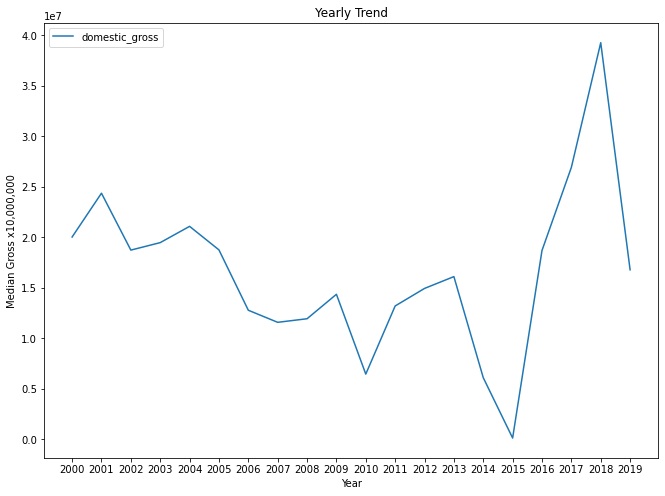

In [24]:
#need to adjust year column to non float
yearly_trend.plot(x='release_year',y='domestic_gross', kind='line', figsize = (11,8))
plt.title('Yearly Trend')
plt.ylabel('Median Gross x10,000,000')
plt.xlabel('Year')
plt.xticks(ticks = x_ticks);

In [56]:
#grouping by month, taking median of values 
monthly_trend = adjusted.groupby('release_month').median()
monthly_trend.drop(['id','production_budget','release_year'], axis=1,inplace=True)
monthly_trend 

,domestic_gross,worldwide_gross
release_month,,
Apr,12292413.5,22752307.5
Aug,17614417.0,30220270.0
Dec,8031955.0,24515990.0
Feb,19389454.0,39778599.0
Jan,17303424.0,32909437.0
Jul,28013509.0,50648806.0
Jun,24004159.0,43658157.0
Mar,15680099.0,25732334.0
May,17723145.0,35366262.5


In [57]:
#reordering columns to correct month order
neworder = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
monthly_trend = monthly_trend.reindex(neworder,axis=0)
monthly_trend

,domestic_gross,worldwide_gross
release_month,,
Jan,17303424.0,32909437.0
Feb,19389454.0,39778599.0
Mar,15680099.0,25732334.0
Apr,12292413.5,22752307.5
May,17723145.0,35366262.5
Jun,24004159.0,43658157.0
Jul,28013509.0,50648806.0
Aug,17614417.0,30220270.0
Sep,10178331.0,19317765.0


In [54]:
# monthly_trend.hist(column = 'domestic_gross')

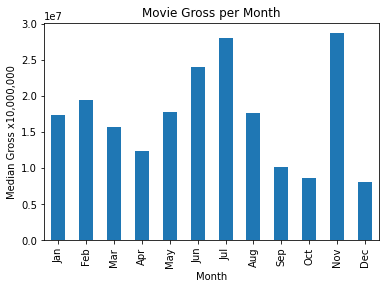

In [58]:
monthly_trend['domestic_gross'].plot(kind='bar')
plt.title('Movie Gross per Month')
plt.ylabel('Median Gross x10,000,000')
plt.xlabel('Month');

Based on the data above, the best months to release movies are June, July, and Nov.

In [ ]:
#should i take correlation coefficient?